In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# 탭으로 구분된 파일 불러오기
chipo = pd.read_csv("./data/chipotle.tsv", sep='\t')

In [43]:
chipo.shape

(4622, 5)

In [44]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [45]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [46]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [47]:
# 고유한 값 기준의 개수 확인
len(chipo["order_id"].unique())

1834

In [48]:
len(chipo["item_name"].unique())

50

In [49]:
# 주문건수 기준 상위 10개 아이템 확인을 위한 추출 작업
item_count = chipo['item_name'].value_counts()[0:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [50]:
# Top 1 ~ Top 10까지 아이템명과 주문건수를 형식에 맞춰 출력 및 확인
for i, v in enumerate(item_count.iteritems(), 1):  
  n, c = v
  print("Top", i, ":", n, c)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


# 아이템별 주문된 총량 확인

In [51]:
# "quantity" 기준으로 합계 확인
item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [52]:
# 시각화를 통한 아이템별 주문총량 분포 현황 확인
x_pos = np.arange(len(item_quantity.keys()))  # 아이템명이 길기 때문에 x축은 숫자로 적용
order_count = item_quantity.values.tolist()

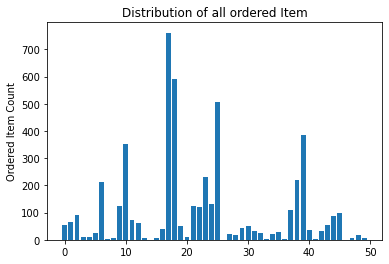

In [53]:
plt.bar(x_pos, order_count)
plt.ylabel("Ordered Item Count")
plt.title("Distribution of all ordered Item")
plt.show()

### => 10개 이내의 아이템에 상당수의 주문량이 몰려있는 것으로 나타남

# 가격정보 기준 분석

In [54]:
# 관련 데이터 전처리 작업 실시 : "item_price" 값에서 달러('$') 표시를 없애고 float로 변환시켜줌
chipo["item_price"] = chipo["item_price"].apply(lambda x : float(x[1:]))
chipo["item_price"]

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

##### ※ apply()함수는 시리즈 단위의 연산을 처리하는 기능을 수행하며, sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받음

In [56]:
# 주문당 평균 계산금액 확인작업 진행
r = chipo.groupby("order_id")["item_price"].sum().mean()
r

18.811428571428568

In [58]:
# 하나의 주문에 총 30달러 이상 지불한 주문번호("order_id") 확인 작업 진행
r = chipo.groupby("order_id")["item_price"].sum()
result = r[r >= 30]  # 위 sum()의 결과가 30 이상인 것들만 추출
result

order_id
20       36.20
28       33.70
40       32.75
75       36.20
93       38.20
         ...  
1768     31.75
1772     32.25
1786    114.30
1825     66.50
1827     32.95
Name: item_price, Length: 143, dtype: float64

In [63]:
# 해당 주문번호 및 개수 확인 => 총 143개로 확인
result.index.values

array([  20,   28,   40,   75,   93,   96,  103,  110,  125,  148,  149,
        178,  184,  186,  195,  205,  230,  231,  234,  235,  247,  276,
        284,  304,  311,  326,  343,  346,  379,  384,  387,  389,  400,
        402,  481,  488,  491,  511,  529,  534,  552,  561,  576,  577,
        623,  628,  635,  649,  654,  688,  691,  708,  734,  737,  759,
        787,  791,  806,  814,  816,  818,  823,  848,  879,  881,  888,
        901,  907,  913,  916,  926,  948,  949,  953,  973,  996, 1006,
       1010, 1013, 1016, 1026, 1035, 1051, 1052, 1057, 1070, 1071, 1082,
       1091, 1167, 1170, 1176, 1182, 1189, 1193, 1223, 1228, 1243, 1248,
       1271, 1323, 1341, 1356, 1360, 1367, 1398, 1402, 1426, 1431, 1443,
       1449, 1453, 1454, 1461, 1483, 1511, 1533, 1554, 1559, 1577, 1586,
       1592, 1598, 1601, 1615, 1648, 1655, 1660, 1679, 1699, 1703, 1718,
       1719, 1737, 1738, 1761, 1764, 1766, 1768, 1772, 1786, 1825, 1827],
      dtype=int64)

In [64]:
len(result.index.values)

143

# 아이템별 가격 정보 추출 및 시각화 작업

In [68]:
r = chipo[chipo.quantity == 1]  # "quantity"가 1인 경우만 추출
result = r.groupby("item_name").min()  # 위 결과에 대해 "item_name" 그룹핑 후, 최소값 기준 추출 => 아이템별 한개씩만 출력하기 위함
result.sort_values(by="item_price", ascending=False)  # "item_price"기준 내림차순으로 정렬
result

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,129,1,[Coke],6.49
Barbacoa Bowl,19,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,11,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,75,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,17,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [69]:
# 위 결과 시각화 작업
x_pos = np.arange(len(result.index.tolist()))  # "item_name" 개수만큼 숫자로 저장
price_per_item = result.item_price.tolist()  # 가격 정보를 배열에 담기

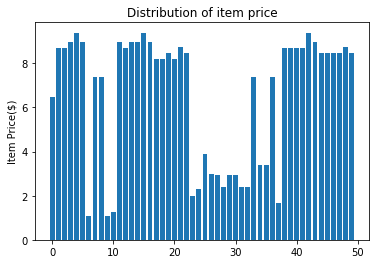

In [73]:
# 바 그래프로 표현
plt.bar(x_pos, price_per_item)
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show()

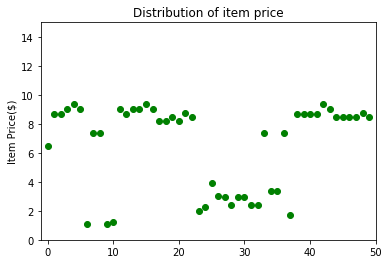

In [74]:
# 초록색 점 그래프로 표현
plt.plot(x_pos, price_per_item, "go")
plt.axis([-1, 50, 0, 15])
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show()

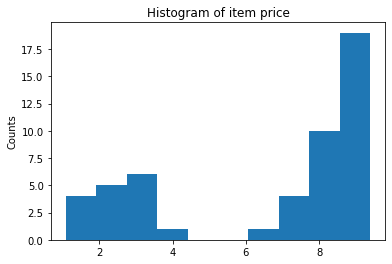

In [75]:
# 히스토그램으로 표현
plt.hist(price_per_item)
plt.ylabel("Counts")
plt.title("Histogram of item price")
plt.show()

### => 가격대는 주로 8 ~ 9달러와 2 ~ 3달러 수준으로 나누어지며, 특히 8~9달러에 집중되어 분포된 것을 확인